In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_column',None)
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

In [2]:
df=pd.read_csv('Fuel_Consumption_2000-2022.csv')

In [3]:
df

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


In [4]:
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [6]:
df.isnull().sum()

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

In [7]:
df=df.rename({'VEHICLE CLASS':'VEHICLE_CLASS','ENGINE SIZE':'ENGINE_SIZE','FUEL CONSUMPTION':'FUEL_CONSUMPTION'},axis=1)

In [8]:
df.columns

Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE_CLASS', 'ENGINE_SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL_CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS'],
      dtype='object')

In [9]:
df.FUEL_CONSUMPTION.value_counts()

12.2    399
11.9    360
10.8    346
11.7    341
11.8    339
       ... 
27.2      1
26.2      1
5.2       1
3.6       1
26.5      1
Name: FUEL_CONSUMPTION, Length: 228, dtype: int64

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'fuel consumption')

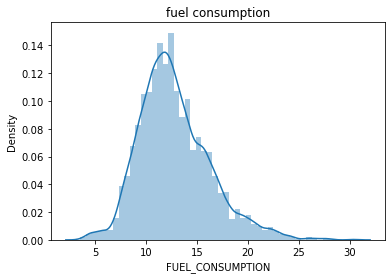

In [10]:
sns.distplot(df.FUEL_CONSUMPTION)
plt.title('fuel consumption')

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'FUEL_CONSUMPTION')

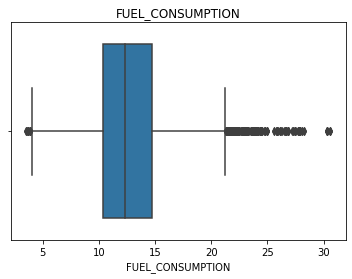

In [11]:
sns.boxplot(df.FUEL_CONSUMPTION)
plt.title('FUEL_CONSUMPTION')

In [12]:
q1=df.FUEL_CONSUMPTION.quantile(0.25)
q3=df.FUEL_CONSUMPTION.quantile(0.75)
iqr=q3-q1
upper_bond_FUEL_CONSUMPTION=q3+(1.5*iqr)
lower_bond_FUEL_CONSUMPTION=q1-(1.5*iqr)
df.FUEL_CONSUMPTION=np.where(df.FUEL_CONSUMPTION>upper_bond_FUEL_CONSUMPTION,upper_bond_FUEL_CONSUMPTION, np.where(df.FUEL_CONSUMPTION <lower_bond_FUEL_CONSUMPTION, lower_bond_FUEL_CONSUMPTION, df.FUEL_CONSUMPTION))

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'FUEL_CONSUMPTION')

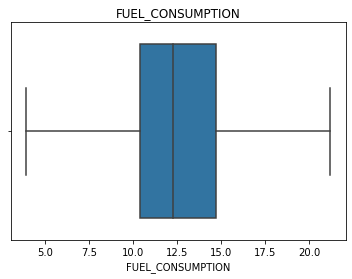

In [13]:
sns.boxplot(df.FUEL_CONSUMPTION)
plt.title('FUEL_CONSUMPTION')

In [14]:
df.YEAR.value_counts()

2015    1132
2016    1110
2009    1092
2018    1083
2012    1081
2008    1079
2011    1076
2017    1058
2013    1058
2019    1056
2007    1043
2014    1040
2010    1021
2005    1019
2020     968
2006     968
2022     955
2021     941
2004     898
2003     820
2002     740
2001     679
2000     639
Name: YEAR, dtype: int64

In [15]:
df.MAKE.value_counts()

CHEVROLET        1725
BMW              1490
GMC              1357
FORD             1276
MERCEDES-BENZ     935
                 ... 
ALFA ROMEO          8
SRT                 4
GENESIS             4
BUGATTI             3
PLYMOUTH            2
Name: MAKE, Length: 87, dtype: int64

<AxesSubplot:xlabel='MAKE', ylabel='count'>

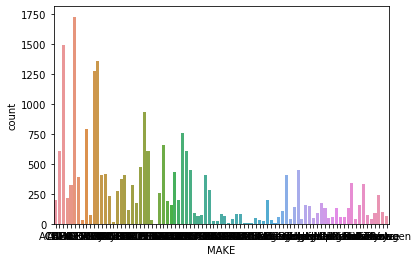

In [16]:
sns.countplot(x='MAKE',data=df)

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
encoder = LabelEncoder()

df_encoded = df

df_encoded["MAKE"] = encoder.fit_transform(df["MAKE"])
df_encoded["MODEL"] = encoder.fit_transform(df["MODEL"])
df_encoded["VEHICLE_CLASS"] = encoder.fit_transform(df["VEHICLE_CLASS"])
df_encoded["TRANSMISSION"] = encoder.fit_transform(df["TRANSMISSION"])
df_encoded["FUEL"] = encoder.fit_transform(df["FUEL"])

In [19]:
annova=ols('MAKE ~FUEL_CONSUMPTION',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

                       df        sum_sq       mean_sq           F  PR(>F)
FUEL_CONSUMPTION      1.0  9.357265e+05  935726.49307  1633.12083     0.0
Residual          22554.0  1.292273e+07     572.96832         NaN     NaN


In [20]:
df.MODEL.value_counts()

2204    89
2633    88
3029    61
3374    58
520     57
        ..
2784     1
642      1
756      1
129      1
4068     1
Name: MODEL, Length: 4242, dtype: int64

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MODEL', ylabel='Density'>

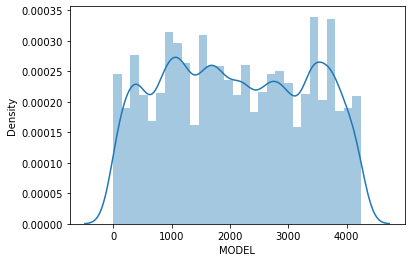

In [21]:
sns.distplot(df.MODEL)

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MODEL'>

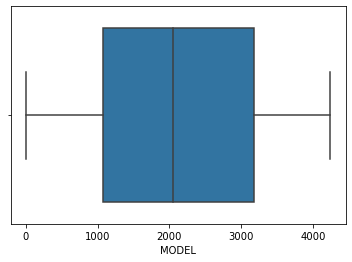

In [22]:
sns.boxplot(df.MODEL)

In [23]:
annova=ols('MODEL ~FUEL_CONSUMPTION',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

                       df        sum_sq       mean_sq          F  PR(>F)
FUEL_CONSUMPTION      1.0  1.779291e+08  1.779291e+08  122.33959     0.0
Residual          22554.0  3.280224e+10  1.454387e+06        NaN     NaN


In [24]:
df.VEHICLE_CLASS.value_counts()

18    2640
0     2636
4     2300
11    1689
17    1559
2     1086
27     999
21     929
19     827
5      783
16     737
7      660
22     608
13     515
20     514
1      491
26     451
3      417
10     403
6      366
15     343
29     332
28     313
30     287
8      211
25     140
12     108
23      62
14      52
24      44
9       42
31      12
Name: VEHICLE_CLASS, dtype: int64

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VEHICLE_CLASS', ylabel='count'>

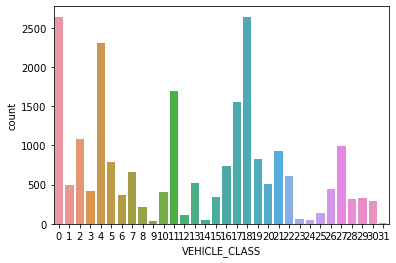

In [25]:
sns.countplot(df.VEHICLE_CLASS)

In [26]:
df.ENGINE_SIZE.value_counts()

2.0    3020
3.0    2070
2.5    1506
3.5    1467
5.3    1230
       ... 
2.1       5
0.9       3
6.3       3
0.8       3
4.1       1
Name: ENGINE_SIZE, Length: 63, dtype: int64

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ENGINE_SIZE', ylabel='Density'>

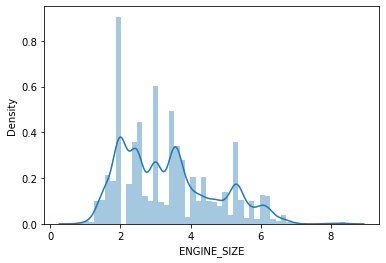

In [27]:
sns.distplot(df.ENGINE_SIZE)

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ENGINE_SIZE'>

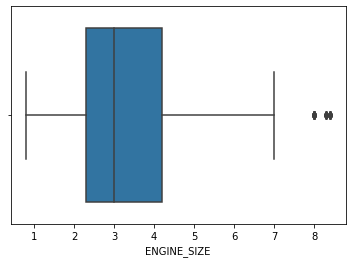

In [28]:
sns.boxplot(df.ENGINE_SIZE)

In [29]:
annova=ols('ENGINE_SIZE ~FUEL_CONSUMPTION',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

                       df       sum_sq      mean_sq           F  PR(>F)
FUEL_CONSUMPTION      1.0  27719.75758  27719.75758  49999.5682     0.0
Residual          22554.0  12503.93623      0.55440         NaN     NaN


In [30]:
df.CYLINDERS.value_counts()

4     8049
6     8021
8     5187
5      499
12     451
10     162
3      159
2       16
16      12
Name: CYLINDERS, dtype: int64

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CYLINDERS', ylabel='Density'>

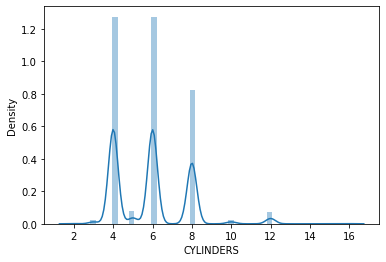

In [31]:
sns.distplot(df.CYLINDERS)

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CYLINDERS'>

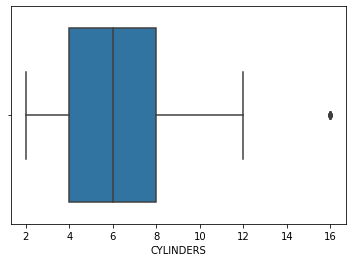

In [32]:
sns.boxplot(df.CYLINDERS)

In [33]:
annova=ols('CYLINDERS ~FUEL_CONSUMPTION',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

                       df       sum_sq      mean_sq            F  PR(>F)
FUEL_CONSUMPTION      1.0  47825.84721  47825.84721  40170.30648     0.0
Residual          22554.0  26852.27604      1.19058          NaN     NaN


In [34]:
df.TRANSMISSION.value_counts()

2     3519
16    2834
28    2609
27    2104
4     1965
18    1733
3     1420
15     865
20     816
6      794
10     689
17     614
7      529
13     335
5      278
14     245
9      214
11     164
0      162
24     143
23     137
29     130
19     110
25      78
22      25
1       24
21       8
8        6
12       5
26       1
Name: TRANSMISSION, dtype: int64

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TRANSMISSION', ylabel='Density'>

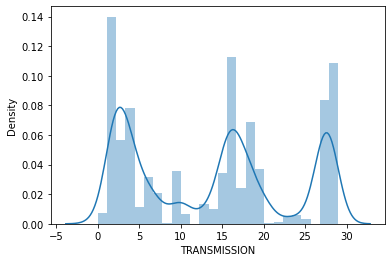

In [35]:
sns.distplot(df.TRANSMISSION)

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TRANSMISSION'>

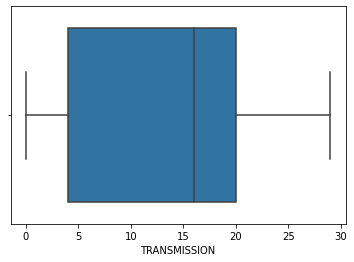

In [36]:
sns.boxplot(df.TRANSMISSION)

In [37]:
annova=ols('TRANSMISSION ~FUEL_CONSUMPTION',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

                       df        sum_sq       mean_sq           F  PR(>F)
FUEL_CONSUMPTION      1.0  2.258150e+05  225815.04547  2811.78441     0.0
Residual          22554.0  1.811317e+06      80.31023         NaN     NaN


In [38]:
df.FUEL.value_counts()


3    11822
4     9316
1     1071
0      314
2       33
Name: FUEL, dtype: int64

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FUEL', ylabel='count'>

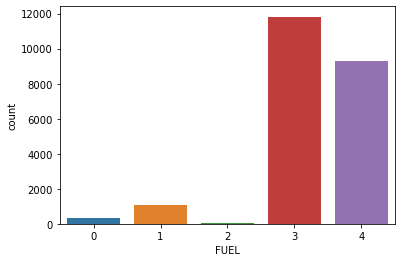

In [39]:
sns.countplot(df.FUEL)

In [40]:
annova=ols('FUEL ~FUEL_CONSUMPTION',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

                       df       sum_sq    mean_sq          F  PR(>F)
FUEL_CONSUMPTION      1.0    186.31471  186.31471  288.42973     0.0
Residual          22554.0  14569.03212    0.64596        NaN     NaN


In [41]:
df=df.rename({'HWY (L/100 km)':'HWY_(L/100_km)'},axis=1)

In [42]:
df.columns

Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE_CLASS', 'ENGINE_SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL_CONSUMPTION', 'HWY_(L/100_km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS'],
      dtype='object')

In [43]:
df.shape

(22556, 13)

In [44]:
df=df.drop(['HWY_(L/100_km)','COMB (L/100 km)','COMB (mpg)','EMISSIONS'],axis=1,)

# SPLIT THE MODEL

In [45]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [46]:
x=df.iloc[:,df.columns!='FUEL_CONSUMPTION']

In [47]:
y=df.iloc[:,df.columns=='FUEL_CONSUMPTION']

In [48]:
x.shape

(22556, 8)

In [49]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           22556 non-null  int64  
 1   MAKE           22556 non-null  int32  
 2   MODEL          22556 non-null  int32  
 3   VEHICLE_CLASS  22556 non-null  int32  
 4   ENGINE_SIZE    22556 non-null  float64
 5   CYLINDERS      22556 non-null  int64  
 6   TRANSMISSION   22556 non-null  int32  
 7   FUEL           22556 non-null  int32  
dtypes: float64(1), int32(5), int64(2)
memory usage: 969.3 KB


In [50]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           22556 non-null  int64  
 1   MAKE           22556 non-null  int32  
 2   MODEL          22556 non-null  int32  
 3   VEHICLE_CLASS  22556 non-null  int32  
 4   ENGINE_SIZE    22556 non-null  float64
 5   CYLINDERS      22556 non-null  int64  
 6   TRANSMISSION   22556 non-null  int32  
 7   FUEL           22556 non-null  int32  
dtypes: float64(1), int32(5), int64(2)
memory usage: 969.3 KB


In [51]:
x=x.rename({'VEHICLE CLASS':'VEHICLE_CLASS'},axis=1)

In [52]:
df=df.drop(['VEHICLE_CLASS'],axis=1)

In [53]:
x.columns

Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE_CLASS', 'ENGINE_SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL'],
      dtype='object')

In [54]:
y.shape

(22556, 1)

In [55]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FUEL_CONSUMPTION  22556 non-null  float64
dtypes: float64(1)
memory usage: 176.3 KB


In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [58]:
linear_reg=LinearRegression()

In [60]:
linear_reg.fit(x_train,y_train)

LinearRegression()

In [61]:
training_data_prediction = linear_reg.predict(x_train)

In [62]:
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.7392001660580387


In [63]:
test_data_prediction = linear_reg.predict(x_test)

In [64]:
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.7328612555701433


In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
y_pred=linear_reg.predict(x_test)
print(len(y_pred))

7895


In [68]:
print('mean-squared-error',metrics.mean_squared_error(y_test,y_pred))

mean-squared-error 2.960049420841952


In [69]:
print('r2score',metrics.r2_score(y_test,y_pred))

r2score 0.7328612555701433


In [70]:
print ("Root Mean Squared Error:" , np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root Mean Squared Error: 1.7204794159890295
